# Assignment 2 - Exploratory Data Analysis and Classification on Diabetes Dataset 

### I know I am submitting late, I have seeked permission from the professor for late submission. Please don't deduct marks for it. Thanks.

AIM: The aim of the entire analysis can be subdivided into following parts:

* Perform data cleaning on the dataset to bring into a format where we can start our analysis
* Perform EDA to get familier with the dataset
* Perform Feature Engineering to make the model simple at the same time highly effective
* Perform classification to predict under what category the outgoing patient falls under:
  * Readmission requried within 30 days
  * Readmission requried within more than 30 days
  * Isn't requried for readmission
* Comapre the methods used to perform the analyis and suggest the best one suitable for this case


PROCESS:

To acheive our end goal we will take help of four supervised learning algorithms namely:

  * k-Nearest Neighbors
  * Decision Trees (Random Forest)
  * Naive Bayes
  * Support Vector Machines (Linear and Nonlinear)

MOTIVE:

The motive to perform this analyis is to be able to be able to predict the group of the patients in above categories so that patients who are if at all requried for early readmissioned can be more closely looked at and the factors impacting this type of occurances could be more closely dealt.

The researchers in the field are intrested in identifying only the people who are requried for early readmssion (i.e. less than 30 days), therefore we will focus just on two categories:
  * Readmission after 30 days and no readmission will be treated as one category: otherwise
  * Readmission within 30 days will be treated as another category: readmitted


Reference: https://www.hindawi.com/journals/bmri/2014/781670/

### Importing Dependencies

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from IPython.core.display import Image
from scipy.stats import mode
import numpy as np
import re
import string
from sklearn import cross_validation, neighbors, preprocessing, metrics, tree
import graphviz

/Users/Gurtej/anaconda/envs/BigDataEngineering/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Exploratory Data Analysis 

#### Getting general idea of the dataset

In [2]:
#Importing data in the dataframe and treating "?" in dataset as NaN
Diabetes_Data = pd.read_csv("~/diabetic_data.csv", na_values=["?"])

/Users/Gurtej/anaconda/envs/BigDataEngineering/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Seeing first few coloum of the dataset
Diabetes_Data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


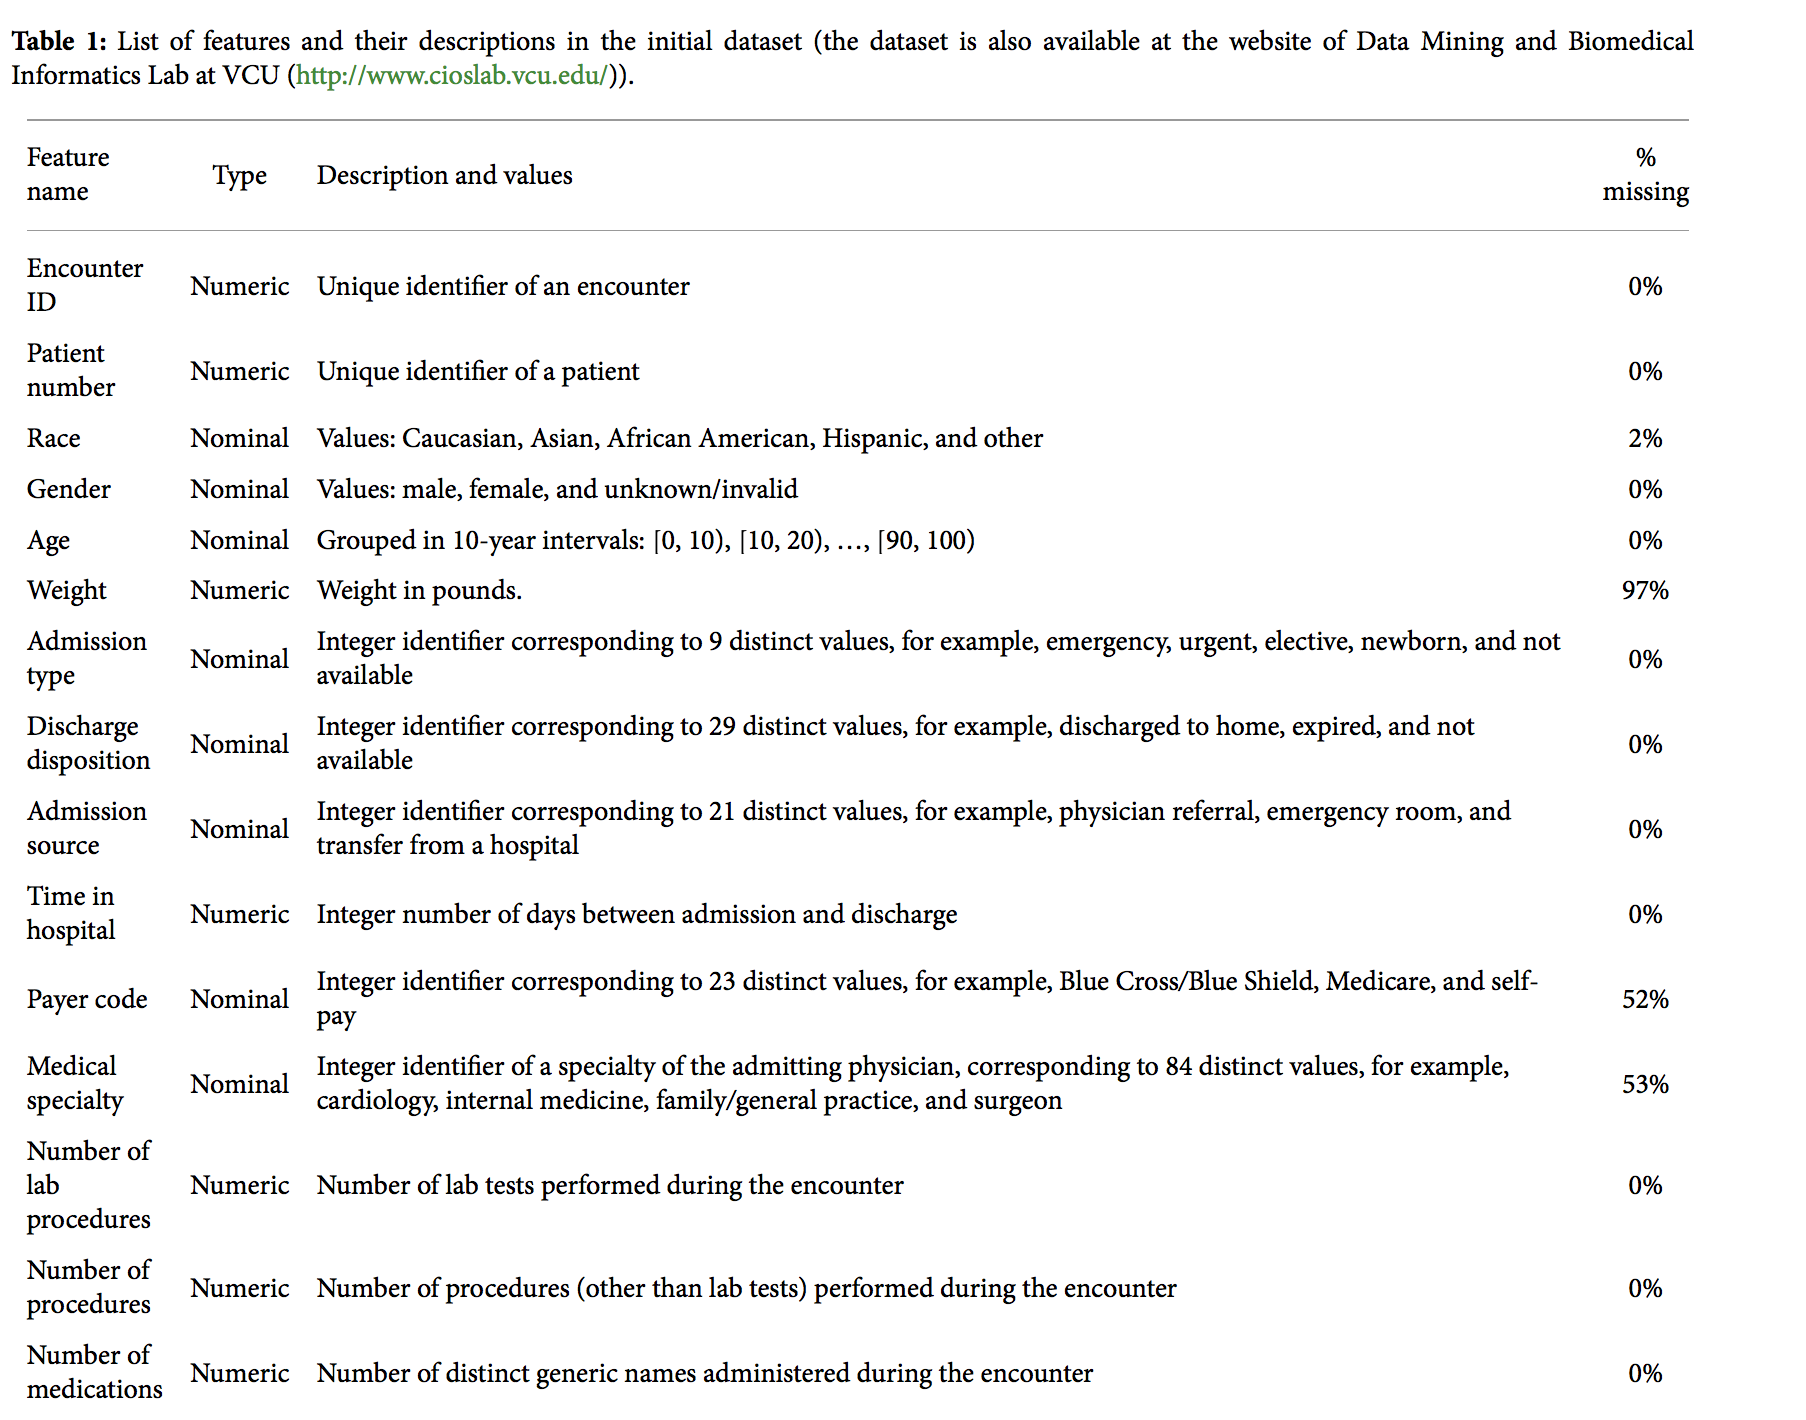

In [4]:
#The next two images are images of data from the dataset website and gives details of the attributes and missing values
Image(filename=("/Users/Gurtej/Desktop/Screen Shot 2017-09-27 at 1.31.33 AM.png"))

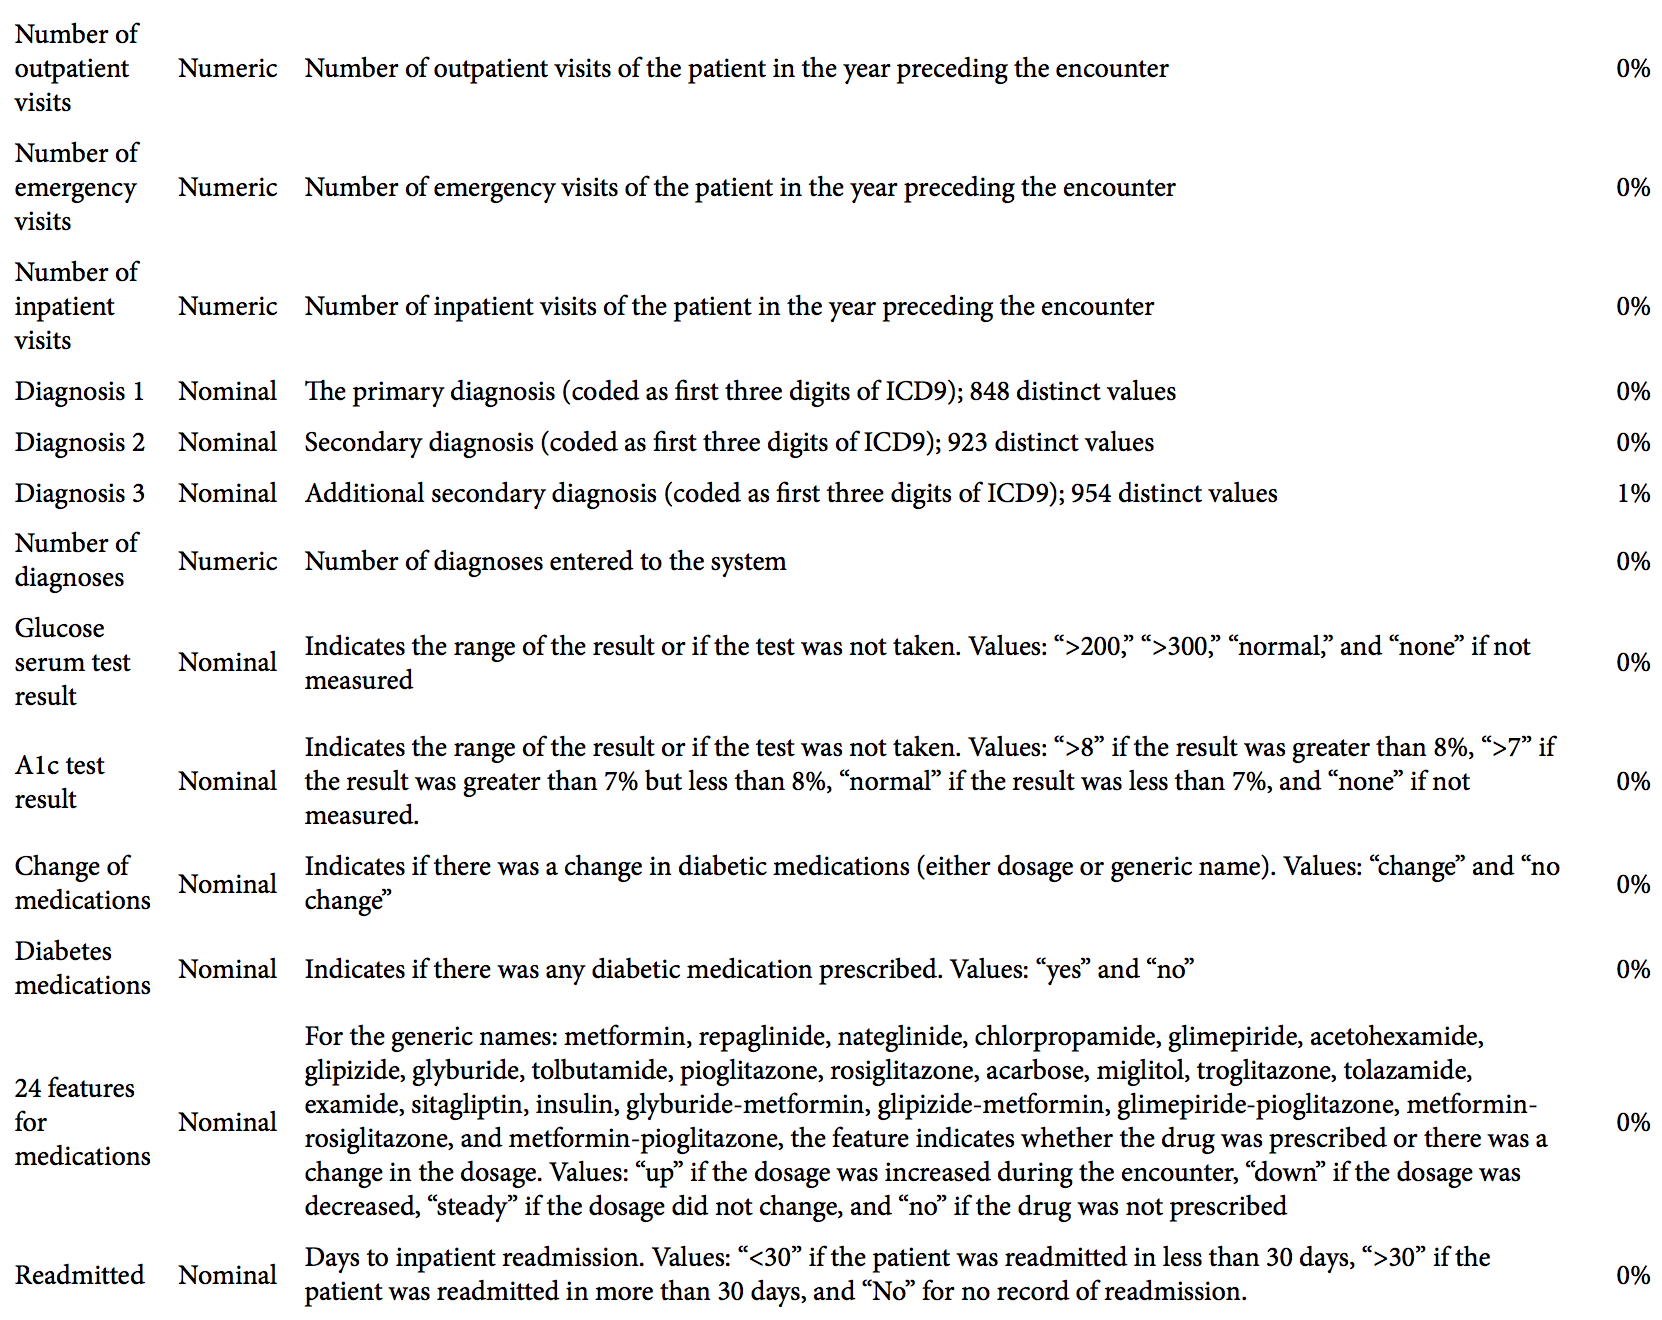

In [5]:
Image(filename=("/Users/Gurtej/Desktop/Screen Shot 2017-09-27 at 1.31.56 AM.png"))

In [6]:
#Creating a copy of dataset, all analysis will be done on the dataset
Diabetes_Data_Copy = Diabetes_Data.copy()

In [7]:
#Dimensions of the dataset
Diabetes_Data_Copy.shape

(101766, 50)

In [8]:
Diabetes_Data_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non

From above it looks like the dataset has 101766 values and 50 attributes

In [9]:
Diabetes_Data_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non

#### Cleaning the dataset

In [10]:
#Taking a look at the coloumn names 
Diabetes_Data_Copy.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

The coloum names seems to be okay, there is no space in any of the coloumn names, so we can move forward with these names for our analysis

In [11]:
#Checking for null objects 
Diabetes_Data_Copy.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

There are 7 coloumns which contain NaN values or missing values. We will see all the 7 coloumns and see if we can impute the data or we will drop the whole coloumn.

The datatypes of all the attributes are either python objects or integers.

#### Let's check out coloumns with missing Data

##### Race

In [12]:
Diabetes_Data_Copy["race"].value_counts(dropna =False)

Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

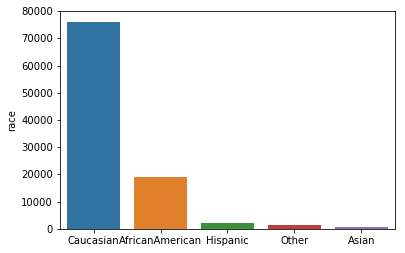

In [13]:
#Distribution of fields under "race" attribute
sns.barplot(x=Diabetes_Data_Copy.race.value_counts().index, 
            y=Diabetes_Data_Copy.race.value_counts())

In [14]:
#Function to impute data for discrete distributions, the function will impute missing values in the column according 
# their probablity distribution
def Impute_Data(x):
    probablity_values = []
    total = len(x)
    column_values = dict(x.value_counts())
    missing_values = sum(x.isnull())
    total_value = sum(column_values.values())
    probablity_values = list(column_values.values())
    probablity_values = [each_value/total_value for each_value in probablity_values]
    impute_list = np.random.choice(list(column_values.keys()), missing_values, p =probablity_values)
    impute_list = list(impute_list)
    
    x.loc[x.isnull()] = impute_list
    

In [15]:
#Imputing "race" attribute using Impute_Data function
Impute_Data(Diabetes_Data_Copy["race"])

/Users/Gurtej/anaconda/envs/BigDataEngineering/lib/python3.5/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
#Value Distribution after imputation
Diabetes_Data_Copy["race"].value_counts()

Caucasian          77859
AfricanAmerican    19622
Hispanic            2089
Other               1542
Asian                654
Name: race, dtype: int64

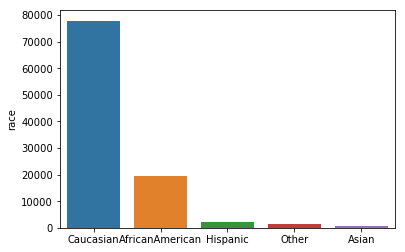

In [17]:
#Distribution graph after imputation
sns.barplot(x=Diabetes_Data_Copy.race.value_counts().index, 
            y=Diabetes_Data_Copy.race.value_counts())

##### Weight

In [18]:
#Distribution of data for "weight" attribute
Diabetes_Data_Copy["weight"].value_counts(dropna =False)

NaN          98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [19]:
print("We can see that the missing value for weight amount to" + " " + str((98569/101766)*100) + "% of total values")

We can see that the missing value for weight amount to 96.85847925633315% of total values


We will just drop the weight coloum as suggested in the paper and continue the analysis

In [20]:
Diabetes_Data_Copy = Diabetes_Data_Copy.drop("weight", axis=1)

##### Payer Code

            
            

As suggested in the paper by the researchers we will just drop "Payer Code" without going into much detail and doing anyfurther analysis.

In [21]:
Diabetes_Data_Copy = Diabetes_Data_Copy.drop("payer_code", axis=1)

In [22]:
Diabetes_Data_Copy.shape

(101766, 48)

We have dropped two variables and the dimension is now reduced to 48 variables

##### Medical Speciality

In [23]:
#Replacing all missing values in medical specialty using term "missing" as suggested in the research paper
Diabetes_Data_Copy["medical_specialty"].fillna("missing", inplace =True )

In [24]:
Diabetes_Data_Copy["medical_specialty"]

0         Pediatrics-Endocrinology
1                          missing
2                          missing
3                          missing
4                          missing
5                          missing
6                          missing
7                          missing
8                          missing
9                 InternalMedicine
10                         missing
11                         missing
12          Family/GeneralPractice
13          Family/GeneralPractice
14                         missing
15                         missing
16                         missing
17                      Cardiology
18                         missing
19                         missing
20                         missing
21                         missing
22                         missing
23                         missing
24                         missing
25                         missing
26                      Cardiology
27                 Surgery-General
28                  

##### diag 1, diag 2 and diag 3

diag 1, diag 2 and diag 3 have very small amout of missing values. One good idea is to drop those rows but we will impute the missing values using the Impute_Data function 

In [25]:
#Imputing values based on distribution 
Impute_Data(Diabetes_Data_Copy["diag_1"])
Impute_Data(Diabetes_Data_Copy["diag_2"])
Impute_Data(Diabetes_Data_Copy["diag_3"])

/Users/Gurtej/anaconda/envs/BigDataEngineering/lib/python3.5/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [26]:
#Verifying that all missing values have been taken care
Diabetes_Data_Copy.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

Sum of all NaNs is 0, which can be used to verify that all missing values have been taken care

#### Let's look at other column before we move further with our analysis

In [27]:
Diabetes_Data_Copy.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,missing,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,missing,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,missing,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,missing,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


encounter_id is unique id corrosponding to the encounter of the event. It won't help in anyway for classification. So we will just drop that attribute.

In [28]:
#Dropping encounter_id
Diabetes_Data_Copy = Diabetes_Data_Copy.drop("encounter_id", axis=1)

Now we have cleaned our data and it's ready for being applied to different machine learning algorithms. The order will be followed as follows:

* k-Nearest Neighbors
* Decision Trees/Random Forest
* Naive Bayes
* Support Vector Machine
* Comparision of above methods

Since we are only intrested in classifying whether the patient was readmitted whithin 30 days, so the patients who were not readmitted at all and patients who were readmitted after 30 days will be considered as one category and we will replace all the patients in category who were readmitted after 30 days and who were not readmitted at all and will call denote the category by "NO"

In [29]:
Diabetes_Data_Copy["readmitted"].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [30]:
#Changing the variables with value = ">30" in readmitted column to "No"
Diabetes_Data_Copy.ix[Diabetes_Data_Copy.readmitted == ">30", "readmitted"] = "NO"

/Users/Gurtej/anaconda/envs/BigDataEngineering/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [31]:
#Checking the value counts for the two categories
Diabetes_Data_Copy["readmitted"].value_counts()

NO     90409
<30    11357
Name: readmitted, dtype: int64

#### Dealing with categorical variables in dataset

#### Race

In [32]:
Diabetes_Data_Copy["race"].value_counts()

Caucasian          77859
AfricanAmerican    19622
Hispanic            2089
Other               1542
Asian                654
Name: race, dtype: int64

In [33]:
Diabetes_Data_Copy["race"].value_counts()

Caucasian          77859
AfricanAmerican    19622
Hispanic            2089
Other               1542
Asian                654
Name: race, dtype: int64

Since almost 78% of the the data belongs to caucasian, we will just have two categories in the dataset, namely cacusian and others.

In [34]:
#converting race to caucasian and others and using 1 to indicate caucasian and 0 for others
Diabetes_Data_Copy["race"] = [1 if x =="Caucasian" else 0 for x in Diabetes_Data_Copy["race"]]

In [35]:
Diabetes_Data_Copy.head(10)

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,1,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,1,Female,[10-20),1,1,7,3,missing,59,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,86047875,0,Female,[20-30),1,1,7,2,missing,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,1,Male,[30-40),1,1,7,2,missing,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,1,Male,[40-50),1,1,7,1,missing,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,82637451,1,Male,[50-60),2,1,2,3,missing,31,...,No,Steady,No,No,No,No,No,No,Yes,NO
6,84259809,1,Male,[60-70),3,1,2,4,missing,70,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,114882984,1,Male,[70-80),1,1,7,5,missing,73,...,No,No,No,No,No,No,No,No,Yes,NO
8,48330783,1,Female,[80-90),2,1,4,13,missing,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,63555939,1,Female,[90-100),3,3,4,12,InternalMedicine,33,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [36]:
#Let's check unique categories in different categorical coloumns in the dataset
for col_names in Diabetes_Data_Copy.columns:
    if Diabetes_Data_Copy[col_names].dtypes == "object":
        unique_cat = len(Diabetes_Data_Copy[col_names].unique())
        print ("Feature {col_names} has {unique_cat} categories".format(
            col_names=col_names, unique_cat=unique_cat))

Feature gender has 3 categories
Feature age has 10 categories
Feature medical_specialty has 73 categories
Feature diag_1 has 716 categories
Feature diag_2 has 748 categories
Feature diag_3 has 789 categories
Feature max_glu_serum has 4 categories
Feature A1Cresult has 4 categories
Feature metformin has 4 categories
Feature repaglinide has 4 categories
Feature nateglinide has 4 categories
Feature chlorpropamide has 4 categories
Feature glimepiride has 4 categories
Feature acetohexamide has 2 categories
Feature glipizide has 4 categories
Feature glyburide has 4 categories
Feature tolbutamide has 2 categories
Feature pioglitazone has 4 categories
Feature rosiglitazone has 4 categories
Feature acarbose has 4 categories
Feature miglitol has 4 categories
Feature troglitazone has 2 categories
Feature tolazamide has 3 categories
Feature examide has 1 categories
Feature citoglipton has 1 categories
Feature insulin has 4 categories
Feature glyburide-metformin has 4 categories
Feature glipizide-m

We see that there are lot's of variable with one categories, since these features will litreally help the model in no ways to help in classification as they will always be constant, let's drop all such variables to simplify the model.

In [37]:
#Let's drop the features having just one category
Diabetes_Data_Copy = Diabetes_Data_Copy.drop("examide", axis=1)
Diabetes_Data_Copy = Diabetes_Data_Copy.drop("citoglipton", axis=1)

In [38]:
#Replacing age range values to mean values
Diabetes_Data_Copy.age.replace(["[0-10)", "[10-20)", "[20-30)", "[30-40)", "[40-50)", "[50-60)", "[60-70)", "[70-80)",
                               "[80-90)", "[90-100)"], [5, 15, 25, 35, 45, 55, 65, 75, 85, 95])

0          5
1         15
2         25
3         35
4         45
5         55
6         65
7         75
8         85
9         95
10        45
11        65
12        45
13        85
14        65
15        65
16        55
17        55
18        75
19        75
20        55
21        65
22        75
23        85
24        75
25        55
26        85
27        55
28        25
29        85
          ..
101736    65
101737    45
101738    75
101739    75
101740    45
101741    95
101742    75
101743    85
101744    85
101745    55
101746    75
101747    75
101748    45
101749    75
101750    85
101751    75
101752    45
101753    45
101754    75
101755    45
101756    65
101757    75
101758    85
101759    85
101760    65
101761    75
101762    85
101763    75
101764    85
101765    75
Name: age, Length: 101766, dtype: int64

In [39]:
#checking gender variable
Diabetes_Data_Copy["gender"].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [40]:
#Removing all rows where gender is invalid or unspecified (only 3 rows are there)
Diabetes_Data_Copy = Diabetes_Data_Copy[Diabetes_Data_Copy["gender"] != "Unknown/Invalid"]

In [41]:
#Converting all the categorial variables to python "category" type and repacing the categorical
#variable with category code
categorical_variable = []
for col_names in Diabetes_Data_Copy.columns:
    if Diabetes_Data_Copy[col_names].dtypes == "object":
        categorical_variable.append(col_names)

In [42]:
categorical_variable

['gender',
 'age',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

We can use one hot encoding depending on the type of categorical variable, to get better
effiency results but we will use nominal encoding and will encode all the categorical
variables the same way

In [43]:
#Encoding all coloumns using nominal encoding
for i in categorical_variable:
    Diabetes_Data_Copy[i] = Diabetes_Data_Copy[i].astype('category')
    Diabetes_Data_Copy[i] = Diabetes_Data_Copy[i].cat.codes

In [44]:
#Having a look at transformed dataframe
Diabetes_Data_Copy.head(10)

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,1,0,0,6,25,1,1,37,41,...,0,1,1,0,0,0,0,1,0,1
1,55629189,1,0,1,1,1,7,3,72,59,...,0,3,1,0,0,0,0,0,1,1
2,86047875,0,0,2,1,1,7,2,72,11,...,0,1,1,0,0,0,0,1,1,1
3,82442376,1,1,3,1,1,7,2,72,44,...,0,3,1,0,0,0,0,0,1,1
4,42519267,1,1,4,1,1,7,1,72,51,...,0,2,1,0,0,0,0,0,1,1
5,82637451,1,1,5,2,1,2,3,72,31,...,0,2,1,0,0,0,0,1,1,1
6,84259809,1,1,6,3,1,2,4,72,70,...,0,2,1,0,0,0,0,0,1,1
7,114882984,1,1,7,1,1,7,5,72,73,...,0,1,1,0,0,0,0,1,1,1
8,48330783,1,0,8,2,1,4,13,72,68,...,0,2,1,0,0,0,0,0,1,1
9,63555939,1,0,9,3,3,4,12,18,33,...,0,2,1,0,0,0,0,0,1,1


In [45]:
for i in categorical_variable:
    print(Diabetes_Data_Copy[i].value_counts())

0    54708
1    47055
Name: gender, dtype: int64
7    26066
6    22482
5    17256
8    17197
4     9685
3     3775
9     2793
2     1657
1      691
0      161
Name: age, dtype: int64
72    49947
18    14635
8      7565
11     7440
3      5351
62     3099
19     1613
27     1400
28     1233
52     1140
51      871
47      854
71      685
24      671
60      652
12      564
69      533
64      468
43      391
25      348
33      254
15      207
20      203
37      159
30      125
9       120
68      109
50      101
45      100
59       98
      ...  
23       19
2        19
32       17
55       17
31       12
1        12
63       11
61       11
44       11
40       10
10        8
65        8
0         7
49        7
4         7
5         6
38        4
6         4
36        3
34        3
54        2
57        1
56        1
21        1
67        1
48        1
7         1
42        1
39        1
46        1
Name: medical_specialty, Length: 73, dtype: int64
276    6863
263    6581
540    4016

From above observation some coloumns are highly biased, 1 value dominating the entire coloumn. Let's see what are those attributes and remove them as they won't play a significant role in model building. 

Such variables are: chlorpropamide, acetohexamide, tolbutamide, miglitol, troglitazone, tolazamide, glipizide-metformin, glimepiride-pioglitazon, metformin-rosiglitazone, metformin-pioglitazone

We will remove these coloumns completly from our dataset

In [46]:
insignificant_predictors = ["chlorpropamide", "acetohexamide", "tolbutamide", "miglitol", "troglitazone", "tolazamide", "glipizide-metformin",
                            "metformin-rosiglitazone", "metformin-pioglitazone", "glimepiride-pioglitazone"]

In [47]:
for i in insignificant_predictors:
    Diabetes_Data_Copy = Diabetes_Data_Copy.drop(i, axis=1)

In [48]:
Diabetes_Data_Copy.shape

(101763, 35)

We have reduced number of parameters to 35. Let's see what else can we do to reduce number of parameters to form a better model. 

### Cheacking for covariance

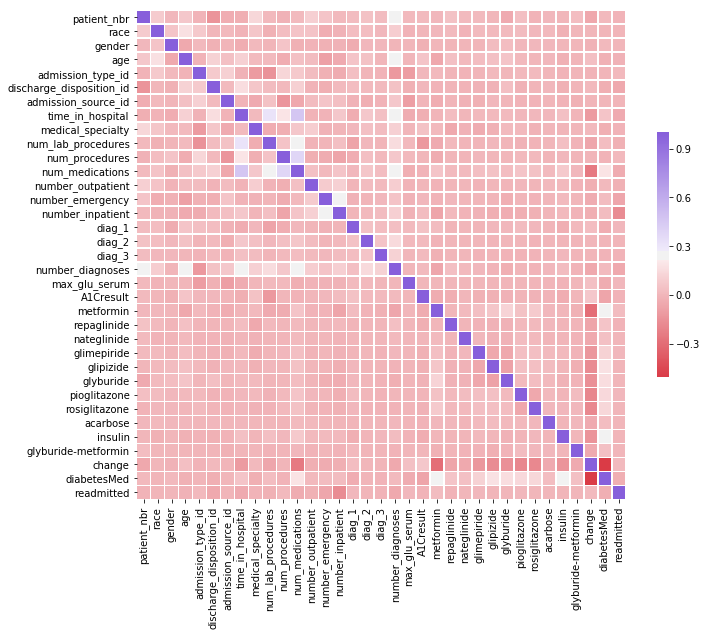

In [49]:
corr = Diabetes_Data_Copy.corr(method = 'pearson') # Correlation Matrix

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 275, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap,square=True, 
            xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

As such from the above graph there doesn't seems to be a strong correlation between any two factors. So it doesn't helps in reducing dimensionlaity in any way.

Note: Not all analysis are sensitive scaling but many that depend on distance metrics are. As we are going apply many algorithms to the data and compare them. Let's scale the data so all analysis use the same data.

In [50]:
Diabetes_Data_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101765
Data columns (total 35 columns):
patient_nbr                 101763 non-null int64
race                        101763 non-null int64
gender                      101763 non-null int8
age                         101763 non-null int8
admission_type_id           101763 non-null int64
discharge_disposition_id    101763 non-null int64
admission_source_id         101763 non-null int64
time_in_hospital            101763 non-null int64
medical_specialty           101763 non-null int8
num_lab_procedures          101763 non-null int64
num_procedures              101763 non-null int64
num_medications             101763 non-null int64
number_outpatient           101763 non-null int64
number_emergency            101763 non-null int64
number_inpatient            101763 non-null int64
diag_1                      101763 non-null int16
diag_2                      101763 non-null int16
diag_3                      101763 non-nul

In [51]:
#Removing patient number as it will not add much to the classification model
Diabetes_Data_Copy = Diabetes_Data_Copy.drop("patient_nbr", axis=1)

In [52]:
#Function to scale all parameters between 0 and 1
def scaled_df(df):
    scaled = pd.DataFrame()
    for item in df:
        if item in df.select_dtypes(include=[np.int8, np.int16, np.int64]):
            scaled[item] = ((df[item] - df[item].min()) / 
            (df[item].max() - df[item].min()))
        else: 
            scaled[item] = df[item]
    return scaled

In [53]:
#Scaling the dataframe
Diabetes_Data_Copy_Scaled = scaled_df(Diabetes_Data_Copy)
Diabetes_Data_Copy_Scaled.head(8)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,glyburide-metformin,change,diabetesMed,readmitted
0,1.0,0.0,0.000000,0.714286,0.888889,0.000000,0.000000,0.513889,0.305344,0.000000,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,1.0,0.0,1.0
1,1.0,0.0,0.111111,0.000000,0.000000,0.250000,0.153846,1.000000,0.442748,0.000000,...,0.333333,0.333333,0.333333,0.333333,0.333333,1.000000,0.333333,0.0,1.0,1.0
2,0.0,0.0,0.222222,0.000000,0.000000,0.250000,0.076923,1.000000,0.076336,0.833333,...,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,1.0,1.0,1.0
3,1.0,1.0,0.333333,0.000000,0.000000,0.250000,0.076923,1.000000,0.328244,0.166667,...,0.333333,0.333333,0.333333,0.333333,0.333333,1.000000,0.333333,0.0,1.0,1.0
4,1.0,1.0,0.444444,0.000000,0.000000,0.250000,0.000000,1.000000,0.381679,0.000000,...,0.666667,0.333333,0.333333,0.333333,0.333333,0.666667,0.333333,0.0,1.0,1.0
5,1.0,1.0,0.555556,0.142857,0.000000,0.041667,0.153846,1.000000,0.229008,1.000000,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.333333,1.0,1.0,1.0
6,1.0,1.0,0.666667,0.285714,0.000000,0.041667,0.230769,1.000000,0.526718,0.166667,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.333333,0.0,1.0,1.0
7,1.0,1.0,0.777778,0.000000,0.000000,0.250000,0.307692,1.000000,0.549618,0.000000,...,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,1.0,1.0,1.0


/Users/Gurtej/anaconda/envs/BigDataEngineering/lib/python3.5/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  This is separate from the ipykernel package so we can avoid doing imports until


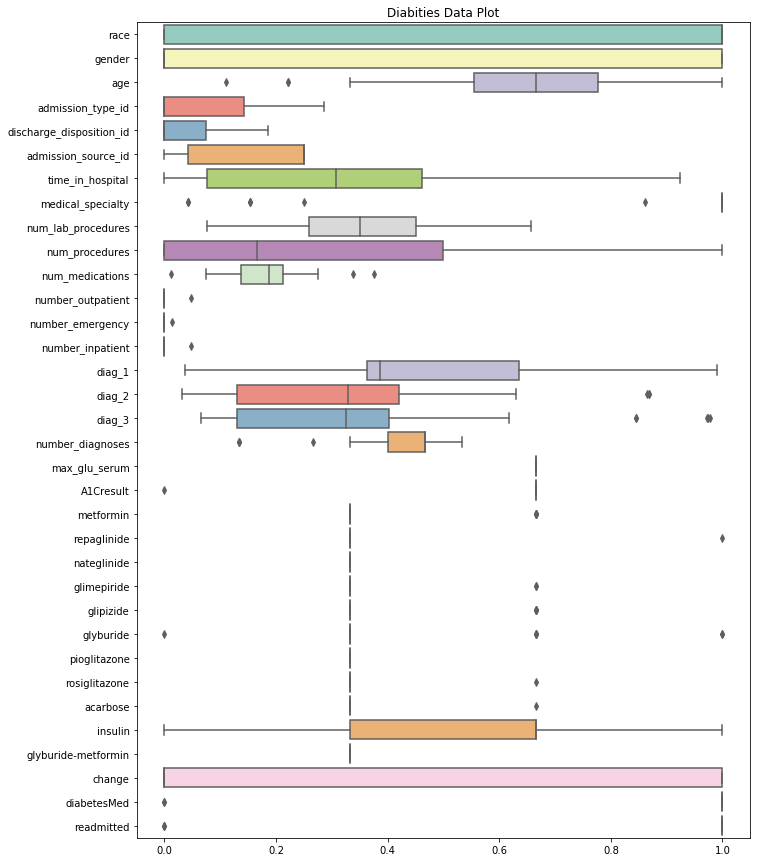

In [54]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#FFFFFF')
plt.title("Diabities Data Plot")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = Diabetes_Data_Copy_Scaled[1:34], 
  orient = 'h', 
  palette = 'Set3')

### Application of Algorithms for Classification

### Preparation of Data

### Scaled Data

In [55]:
#Dividing data in predictor variable and target variable ()
X_scaled = np.array(Diabetes_Data_Copy_Scaled.drop(["readmitted"],1))
y_scaled = np.array(Diabetes_Data_Copy_Scaled["readmitted"])

In [56]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = cross_validation.train_test_split(X_scaled, y_scaled, test_size =0.25 )

### Unscaled Data

In [57]:
X_unscaled = np.array(Diabetes_Data_Copy.drop(["readmitted"],1))
y_unscaled = np.array(Diabetes_Data_Copy["readmitted"])

In [58]:
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = cross_validation.train_test_split(X_unscaled, y_unscaled, test_size =0.25) 

### Normalized Data

In [59]:
X_normalized = preprocessing.normalize(X_unscaled, norm="l2")
y_normalized = preprocessing.normalize(y_unscaled.reshape(-1,1), norm ="l2")
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = cross_validation.train_test_split(X_normalized, y_normalized, test_size =0.25 )

### Part A - k-Nearest Neighbors

### Unscaled Classifier 

In [122]:
# creating odd list of K for KNN
myList = list(range(1,33))

# subsetting just the odd ones
neighbors_unscaled = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores_unscaled = []

# perform 10-fold cross validation
for k in neighbors_unscaled:
    knn_unscaled = neighbors.KNeighborsClassifier(n_neighbors = k)
    scores_unscaled = cross_validation.cross_val_score(knn_unscaled, X_train_unscaled, y_train_unscaled, cv=10, scoring='accuracy')
    cv_scores_unscaled.append(scores_unscaled.mean())

The optimal number of neighbors is 31


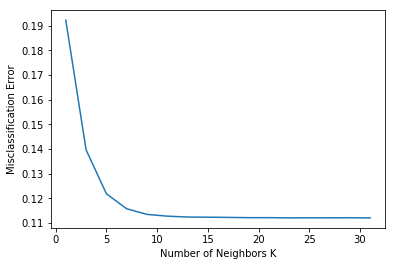

In [188]:
# changing to misclassification error
MSE_unscaled = [1 - x for x in cv_scores_unscaled]

# determining best k
optimal_k_unscaled = neighbors_unscaled[MSE_unscaled.index(min(MSE_unscaled))]
print ("The optimal number of neighbors is %d" %optimal_k_unscaled)


# plot misclassification error vs k
plt.plot(neighbors_unscaled, MSE_unscaled)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

As k increases the misclassification error is decreasing and it is minimum for k =31. 

In [189]:
cv_scores_unscaled

[0.80782743192903861,
 0.86031559418045611,
 0.87809553264231011,
 0.88420118643332157,
 0.88646790816364918,
 0.88717541414071854,
 0.88754228187119433,
 0.88760778691418296,
 0.88768639124935989,
 0.88779121477068368,
 0.88779121820431206,
 0.88786982940674586,
 0.88784361022104896,
 0.88784362052193377,
 0.88781740992053282,
 0.88789602284045532]

Since crossvalidation is taking lot of computation power and theirefore lot of time. To understand the impact of scaling on the accuracy we will just fit the classifier on the tranning data and test it on testing data and see the accuracy in all three cases. NOTE: In scaled and Normalized data, we'll not perform k-fold cross-validation.

In [83]:
#Creating classifier and trainning on unscaled data 
knn_classifier_unscaled = neighbors.KNeighborsClassifier(n_neighbors=31)
knn_fit_unscaled = knn_classifier_unscaled.fit(X_train_unscaled, y_train_unscaled)

In [84]:
#Predicting the target variable using the above classifier
y_pred_knn_unscaled = knn_fit_unscaled.predict(X_test_unscaled)

In [86]:
#Using accuracy matrix to check the prediction accuracy
pred_accuracy_knn_unscaled = metrics.accuracy_score(y_test_unscaled, y_pred_knn_unscaled)
print (pred_accuracy_knn_unscaled)

0.886010770017


### Scaled Classifier

In [87]:
#Creating classifier and trainning on scaled data 
knn_classifier_scaled = neighbors.KNeighborsClassifier(n_neighbors=31)
knn_fit_scaled = knn_classifier_scaled.fit(X_train_scaled, y_train_scaled)

In [88]:
#Predicting the target variable using the above classifier
y_pred_knn_scaled = knn_fit_scaled.predict(X_test_scaled)

In [89]:
#Using accuracy matrix to check the prediction accuracy
pred_accuracy_knn_scaled = metrics.accuracy_score(y_test_scaled, y_pred_knn_scaled)
print (pred_accuracy_knn_scaled)

0.888722927558


### Normalized Classifier

In [90]:
#Creating classifier and trainning on normalized data 
knn_classifier_normalized = neighbors.KNeighborsClassifier(n_neighbors=31)
knn_fit_normalized = knn_classifier_scaled.fit(X_train_normalized, y_train_normalized)

/Users/Gurtej/anaconda/envs/BigDataEngineering/lib/python3.5/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
#Predicting the target variable using the above classifier
y_pred_knn_normalized = knn_fit_normalized.predict(X_test_normalized)

In [92]:
#Using accuracy matrix to check the prediction accuracy
pred_accuracy_knn_normalized = metrics.accuracy_score(y_test_normalized, y_pred_knn_normalized)
print (pred_accuracy_knn_normalized)

0.887425808734


### Part - B Decision Trees

### Scaled decesion tree

In [65]:
clf_decision_tree_scaled = tree.DecisionTreeClassifier()

In [66]:
decision_tree_scaled_fit = clf_decision_tree_scaled.fit(X_train_scaled, y_train_scaled)

In [80]:
y_pred_decesion_tree_scaled = decision_tree_scaled_fit.predict(X_test_scaled)

In [86]:
pred_accuracy_decesion_tree_scaled = metrics.accuracy_score(y_test_scaled, y_pred_decesion_tree_scaled)
print (pred_accuracy_decesion_tree_scaled)

0.79749223694


### Unscaled decesion tree

In [83]:
clf_decision_tree_unscaled = tree.DecisionTreeClassifier()

In [84]:
decision_tree_unscaled_fit = clf_decision_tree_unscaled.fit(X_train_unscaled, y_train_unscaled)

In [85]:
y_pred_decesion_tree_unscaled = decision_tree_unscaled_fit.predict(X_test_unscaled)

In [87]:
pred_accuracy_decesion_tree_unscaled = metrics.accuracy_score(y_test_unscaled, y_pred_decesion_tree_unscaled)
print (pred_accuracy_decesion_tree_unscaled)

0.793404347313


### Normalized decesion tree

In [63]:
clf_decision_tree_normalized = tree.DecisionTreeClassifier()

In [64]:
decision_tree_normalized_fit = clf_decision_tree_normalized.fit(X_train_normalized, y_train_normalized)

In [65]:
y_pred_decesion_tree_normalized = decision_tree_normalized_fit.predict(X_test_normalized)

In [66]:
pred_accuracy_decesion_tree_normalized = metrics.accuracy_score(y_test_normalized, y_pred_decesion_tree_normalized)
print (pred_accuracy_decesion_tree_normalized)

0.794465626351


In [67]:
feature_names = list(Diabetes_Data_Copy_Scaled.drop(["readmitted"],1).columns)
class_names = "readmitted"

In [102]:
dot_data = tree.export_graphviz(clf_decision_tree_unscaled, out_file=None, 
                         feature_names=feature_names,  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


As seen from the above error, I cannot generate the graph for the tree. It's the inherent error in jupyter notebook for the bigger dimension images. It is likely to be resolved in the jupyter 5.1 version. We can go around the problem right now as well but by tempering the config file but with current system specs it is taking a lot of time to generate the graph. I will either have to try using parallel processing library to allow using all four cores to get the work done or do try to generate graph on cloud which is outside the scope of the assignment.

As we are not able to generate the graph, I will not be able to answer the question if the branches make sense.

### Creating random forest classifier 

We will create a random forest classifier to see if it makes differece by using ensemble of tree to improve accuracy on the classification. Since the normalized data gave the maximum accuracy we will try random forest on the normalized data and compare and contrast accuracy of random forest vs the trees.


In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
clf_Random_Forest_normaized = RandomForestClassifier(15, criterion= "entropy", n_jobs= -1)

In [107]:
clf_Random_Forest_normaized_fit = clf_Random_Forest_normaized.fit(X_train_normalized, y_train_scaled)

In [109]:
y_Random_Forest_normaized_pred = clf_Random_Forest_normaized_fit.predict(X_test_normalized)

In [111]:
clf_Random_Forest_normaized_accuracy = metrics.accuracy_score(y_test_normalized, y_Random_Forest_normaized_pred)
print(clf_Random_Forest_normaized_accuracy)

0.887425808734


### Part - C Naive Bayes

In [90]:
from sklearn import naive_bayes

We will use Bernoulli distribution for naive bayes as the the output (readmitted) can be either 0 or 1 

### Unscaled Naive Bayes

In [109]:
clf_naive_bayes_unscaled = naive_bayes.BernoulliNB()

In [110]:
naive_bayes_unscaled_fit = clf_naive_bayes_unscaled.fit(X_train_unscaled, y_train_unscaled)

In [111]:
y_naive_bayes_unscaled = naive_bayes_unscaled_fit.predict(X_test_unscaled)

In [113]:
naive_bayes_unscaled_accuracy = metrics.accuracy_score(y_test_unscaled, y_naive_bayes_unscaled)
print(naive_bayes_unscaled_accuracy)

0.885932156755


### Scaled Naive Bayes

In [114]:
clf_naive_bayes_scaled = naive_bayes.BernoulliNB()

In [115]:
naive_bayes_scaled_fit = clf_naive_bayes_scaled.fit(X_train_scaled, y_train_scaled)

In [116]:
y_naive_bayes_scaled = naive_bayes_scaled_fit.predict(X_test_scaled)

In [117]:
naive_bayes_scaled_accuracy = metrics.accuracy_score(y_test_scaled, y_naive_bayes_scaled)
print(naive_bayes_scaled_accuracy)

0.889312527023


### Normalized Naive Bayes

In [118]:
clf_naive_bayes_normalized = naive_bayes.BernoulliNB()

In [119]:
naive_bayes_normalized_fit = clf_naive_bayes_scaled.fit(X_train_normalized, y_train_normalized)

/Users/Gurtej/anaconda/envs/BigDataEngineering/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
y_naive_bayes_normalized = naive_bayes_normalized_fit.predict(X_test_normalized)

In [121]:
naive_bayes_normalized_accuracy = metrics.accuracy_score(y_test_normalized, y_naive_bayes_normalized)
print(naive_bayes_normalized_accuracy)

0.889469753547


### Part - D Support Vector Machine (SVM)

In [61]:
from sklearn import svm

### SVM for unscaled data

In [68]:
SVM_classifier_unscaled = svm.SVC()

Its computationally infeasible to fit the entire trainning data, therefore training the classifier on first 10000 values of trainning data

In [63]:
#tranning with the defaults
SVM_classifier_unscaled_fit = SVM_classifier_unscaled.fit(X_train_unscaled[:10000], y_train_unscaled[:10000])

In [66]:
#fitting 
SVM_classifier_unscaled_fit_pred = SVM_classifier_unscaled_fit.predict(X_test_unscaled)

In [67]:
#classification accuracy
clf_SVM_classifier_unscaled_accuracy = metrics.accuracy_score(y_test_unscaled, SVM_classifier_unscaled_fit_pred)
print(clf_SVM_classifier_unscaled_accuracy)

0.885932156755


Though we trained the data on just 10000 observations we got a pretty got accuracy of 88.5%

### SVM for scaled data

In [69]:
SVM_classifier_scaled = svm.SVC()

In [70]:
#tranning with the defaults
SVM_classifier_scaled_fit = SVM_classifier_scaled.fit(X_train_scaled[:10000], y_train_scaled[:10000])

In [71]:
#fitting 
SVM_classifier_scaled_fit_pred = SVM_classifier_scaled_fit.predict(X_test_scaled)

In [72]:
#classification accuracy
clf_SVM_classifier_scaled_accuracy = metrics.accuracy_score(y_test_scaled, SVM_classifier_scaled_fit_pred)
print(clf_SVM_classifier_scaled_accuracy)

0.889312527023


### SVM for normalized data

In [74]:
SVM_classifier_normalized = svm.SVC()

In [75]:
#tranning with the defaults
SVM_classifier_normalized_fit = SVM_classifier_normalized.fit(X_train_normalized[:10000], y_train_normalized[:10000])

/Users/Gurtej/anaconda/envs/BigDataEngineering/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
#fitting 
SVM_classifier_normalized_fit_pred = SVM_classifier_normalized_fit.predict(X_test_normalized)

In [77]:
#classification accuracy
clf_SVM_classifier_normalized_accuracy = metrics.accuracy_score(y_test_normalized, SVM_classifier_normalized_fit_pred)
print(clf_SVM_classifier_normalized_accuracy)

0.889509060178


The normalized data gives the best accuracy

### Trying different kernels

We are going to try kernels just for the normalized data and we will compare the accuracy results. The default kernel was "rbf", we are going to use linear, poly and sigmoid apart from the rbf.

### Linear

In [78]:
SVM_classifier_normalized_linear = svm.SVC(kernel= "linear")

In [79]:
#tranning with the defaults
SVM_classifier_normalized_fit_linear = SVM_classifier_normalized_linear.fit(X_train_normalized[:10000], y_train_normalized[:10000])

/Users/Gurtej/anaconda/envs/BigDataEngineering/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
#fitting 
SVM_classifier_normalized_fit_linear_pred = SVM_classifier_normalized_fit_linear.predict(X_test_normalized)

In [81]:
#classification accuracy
clf_SVM_classifier_normalized_linear_accuracy = metrics.accuracy_score(y_test_normalized, SVM_classifier_normalized_fit_linear_pred)
print(clf_SVM_classifier_normalized_linear_accuracy)

0.889509060178


### poly

In [82]:
SVM_classifier_normalized_poly = svm.SVC(kernel= "poly")

In [83]:
#tranning
SVM_classifier_normalized_fit_poly = SVM_classifier_normalized_poly.fit(X_train_normalized[:10000], y_train_normalized[:10000])

/Users/Gurtej/anaconda/envs/BigDataEngineering/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
#fitting 
SVM_classifier_normalized_fit_poly_pred = SVM_classifier_normalized_fit_poly.predict(X_test_normalized)

In [85]:
#classification accuracy
clf_SVM_classifier_normalized_poly_accuracy = metrics.accuracy_score(y_test_normalized, SVM_classifier_normalized_fit_poly_pred)
print(clf_SVM_classifier_normalized_poly_accuracy)

0.889509060178


### Sigmoid

In [86]:
SVM_classifier_normalized_sigmoid = svm.SVC(kernel= "sigmoid")

In [87]:
#tranning 
SVM_classifier_normalized_fit_sigmoid = SVM_classifier_normalized_sigmoid.fit(X_train_normalized[:10000], y_train_normalized[:10000])

/Users/Gurtej/anaconda/envs/BigDataEngineering/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
#fitting 
SVM_classifier_normalized_fit_sigmoid_pred = SVM_classifier_normalized_fit_sigmoid.predict(X_test_normalized)

In [89]:
#classification accuracy
clf_SVM_classifier_normalized_sigmoid_accuracy = metrics.accuracy_score(y_test_normalized, SVM_classifier_normalized_fit_sigmoid_pred)
print(clf_SVM_classifier_normalized_sigmoid_accuracy)

0.889509060178


There is no difference in accuracy by chaing kernel to linear, poly and sigmoid

### Part - E Compare the methods

The accuracies for KNN, naive bayes, random forest and SVM were almost the same. Using pure tree gave a little less accuracy. I will go with random forest classifier as it was fast and just with 10000 tranning samples it was able to give equavalent accuracy of other classifiers. The accuracy for random forest was 88.74%. Moreover if we had enough computational power we could have tried making some trees for the random forest and tried and it could have given a logical understanding of what's happening in the model.

Every model had a lot of scope of improvemnet though parameter and hyperparameter tuning.